Evaluate CNN Classifier using using real images
==============================================================

Validate Result using Real data
------------------------------

To validate the results using real data, let's use an image collected during ISS operations

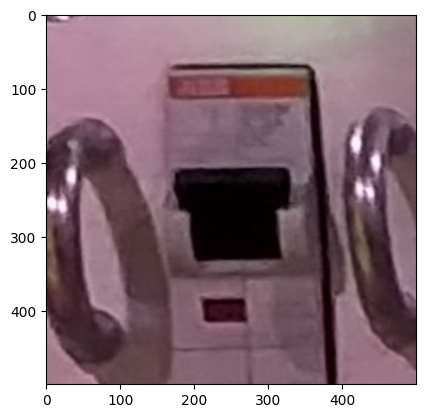

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Classification: on with a confidence level of 0.95


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
from torch import nn, optim
from torchvision import datasets, models, transforms


# Parameters
classes = ['off', 'on']  # specify the image classes
num_epochs = 45  # number of epochs to train
model_name = 'switch_model_cnn.pt'  # saved model name
trace_model_name = 'traced_model_cnn.pt'  # saved traced model name

# Open and display image
image = Image.open('PATH_TO_IMAGE_PATCH_TO_EVALUATE')
imgplot = plt.imshow(image)
plt.show()

# Open model
model = models.densenet121(pretrained=True)
model.classifier = nn.Sequential(
    nn.Linear(1024, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 3),
    nn.LogSoftmax(dim=1),
)
model.load_state_dict(torch.load('switch_model_cnn.pt'))
model.eval()

# Classify Image!
test_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
image_tensor = test_transforms(image).float()
image_tensor = image_tensor.unsqueeze_(0)
output = model(image_tensor)

# Apply softmax to get probabilities
probabilities = torch.nn.functional.softmax(output, dim=1)

# Get the predicted class and its probability
_, predicted = torch.max(probabilities, 1)
confidence = probabilities[0][predicted.item()].item()

# Print the result with the certainty
print(f'Classification: {classes[predicted.item()]} with a confidence level of {confidence:.2f}')